# DIT-HAP Plot Style Visualization

This notebook demonstrates the various plot styling parameters defined in `config/DIT_HAP.mplstyle`. The style is designed for creating publication-quality figures with consistent formatting across the DIT-HAP pipeline.

## Style Overview

The DIT_HAP.mplstyle file defines:
- **Font settings**: Arial font, size 18 for general text
- **Axes styling**: Bold labels, custom tick sizes, specific colors
- **Line properties**: Width 4, custom dash patterns
- **Legend positioning**: Outside plot area at (1.05, 0.3)
- **Color cycle**: Custom 10-color palette
- **Figure settings**: High DPI (300), transparent background

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

# Set the style
plt.style.use('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/config/DIT_HAP.mplstyle')
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
AX_WIDTH, AX_HEIGHT = plt.rcParams['figure.figsize']

print("DIT-HAP style loaded successfully!")

DIT-HAP style loaded successfully!


## 1. Basic Line Plot - Color Cycle and Line Properties

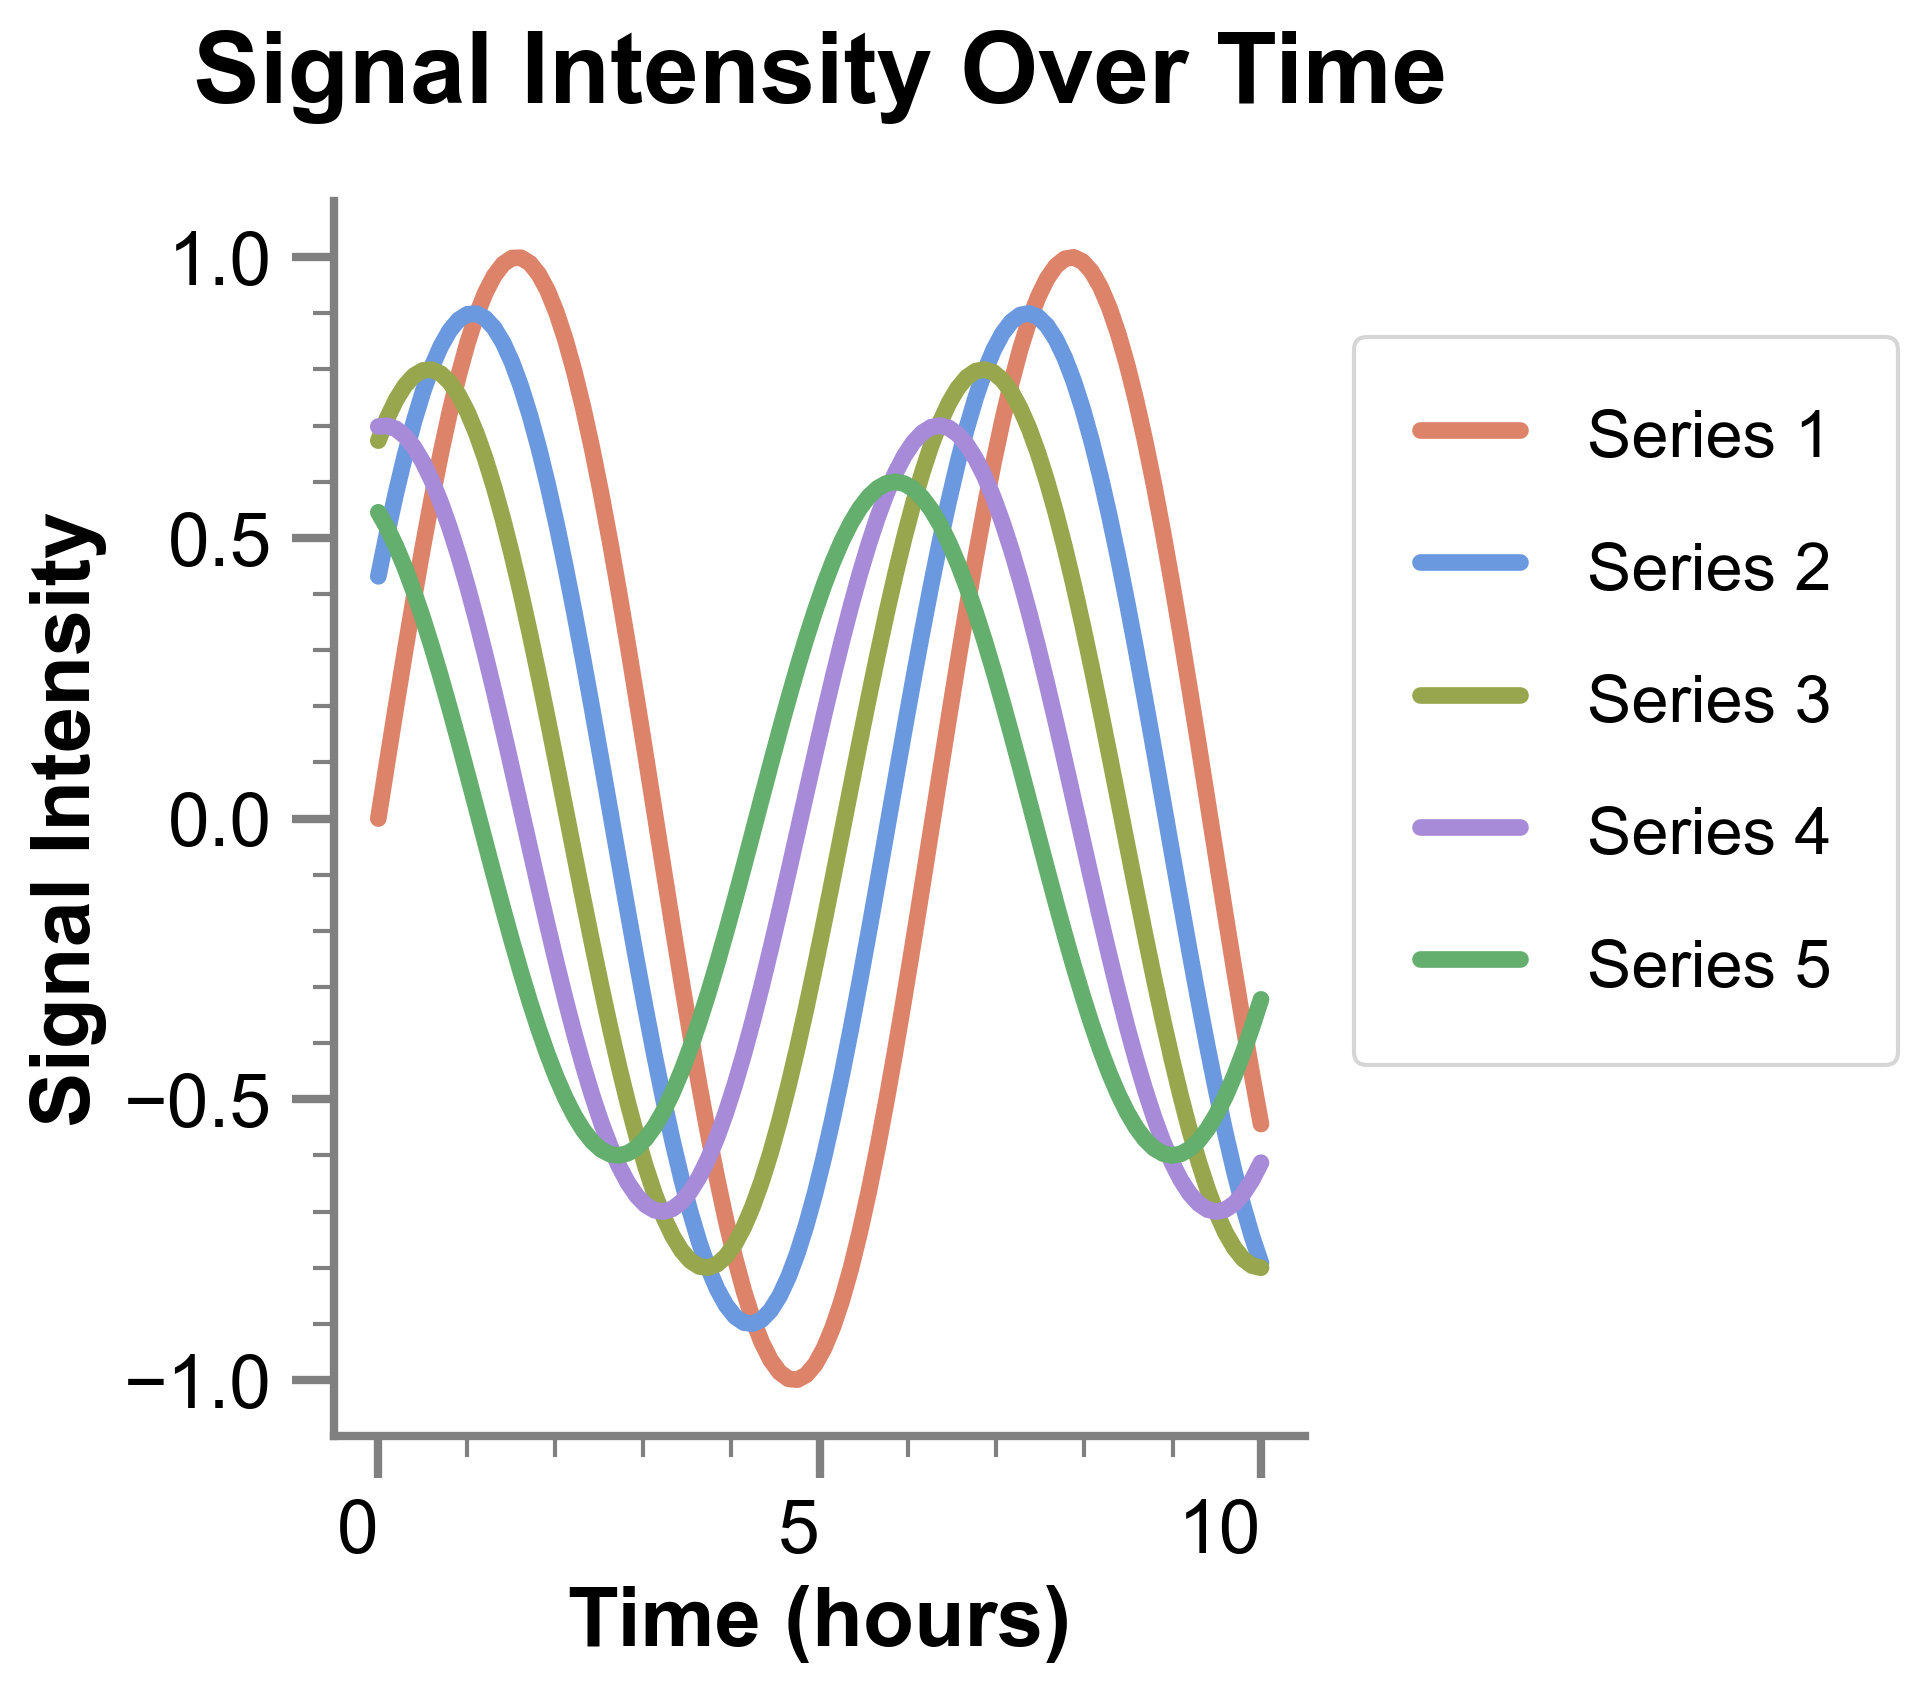

In [43]:
# Create sample data
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()

# Plot multiple lines to demonstrate color cycle
for i in range(5):
    y = np.sin(x + i * 0.5) * (1 - i * 0.1)
    ax.plot(x, y, label=f'Series {i+1}')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Signal Intensity')
ax.set_title('Signal Intensity Over Time')
ax.legend()
# ax.grid(True, alpha=0.3)

plt.show()
plt.close()

## 2. Scatter Plot with Different Markers

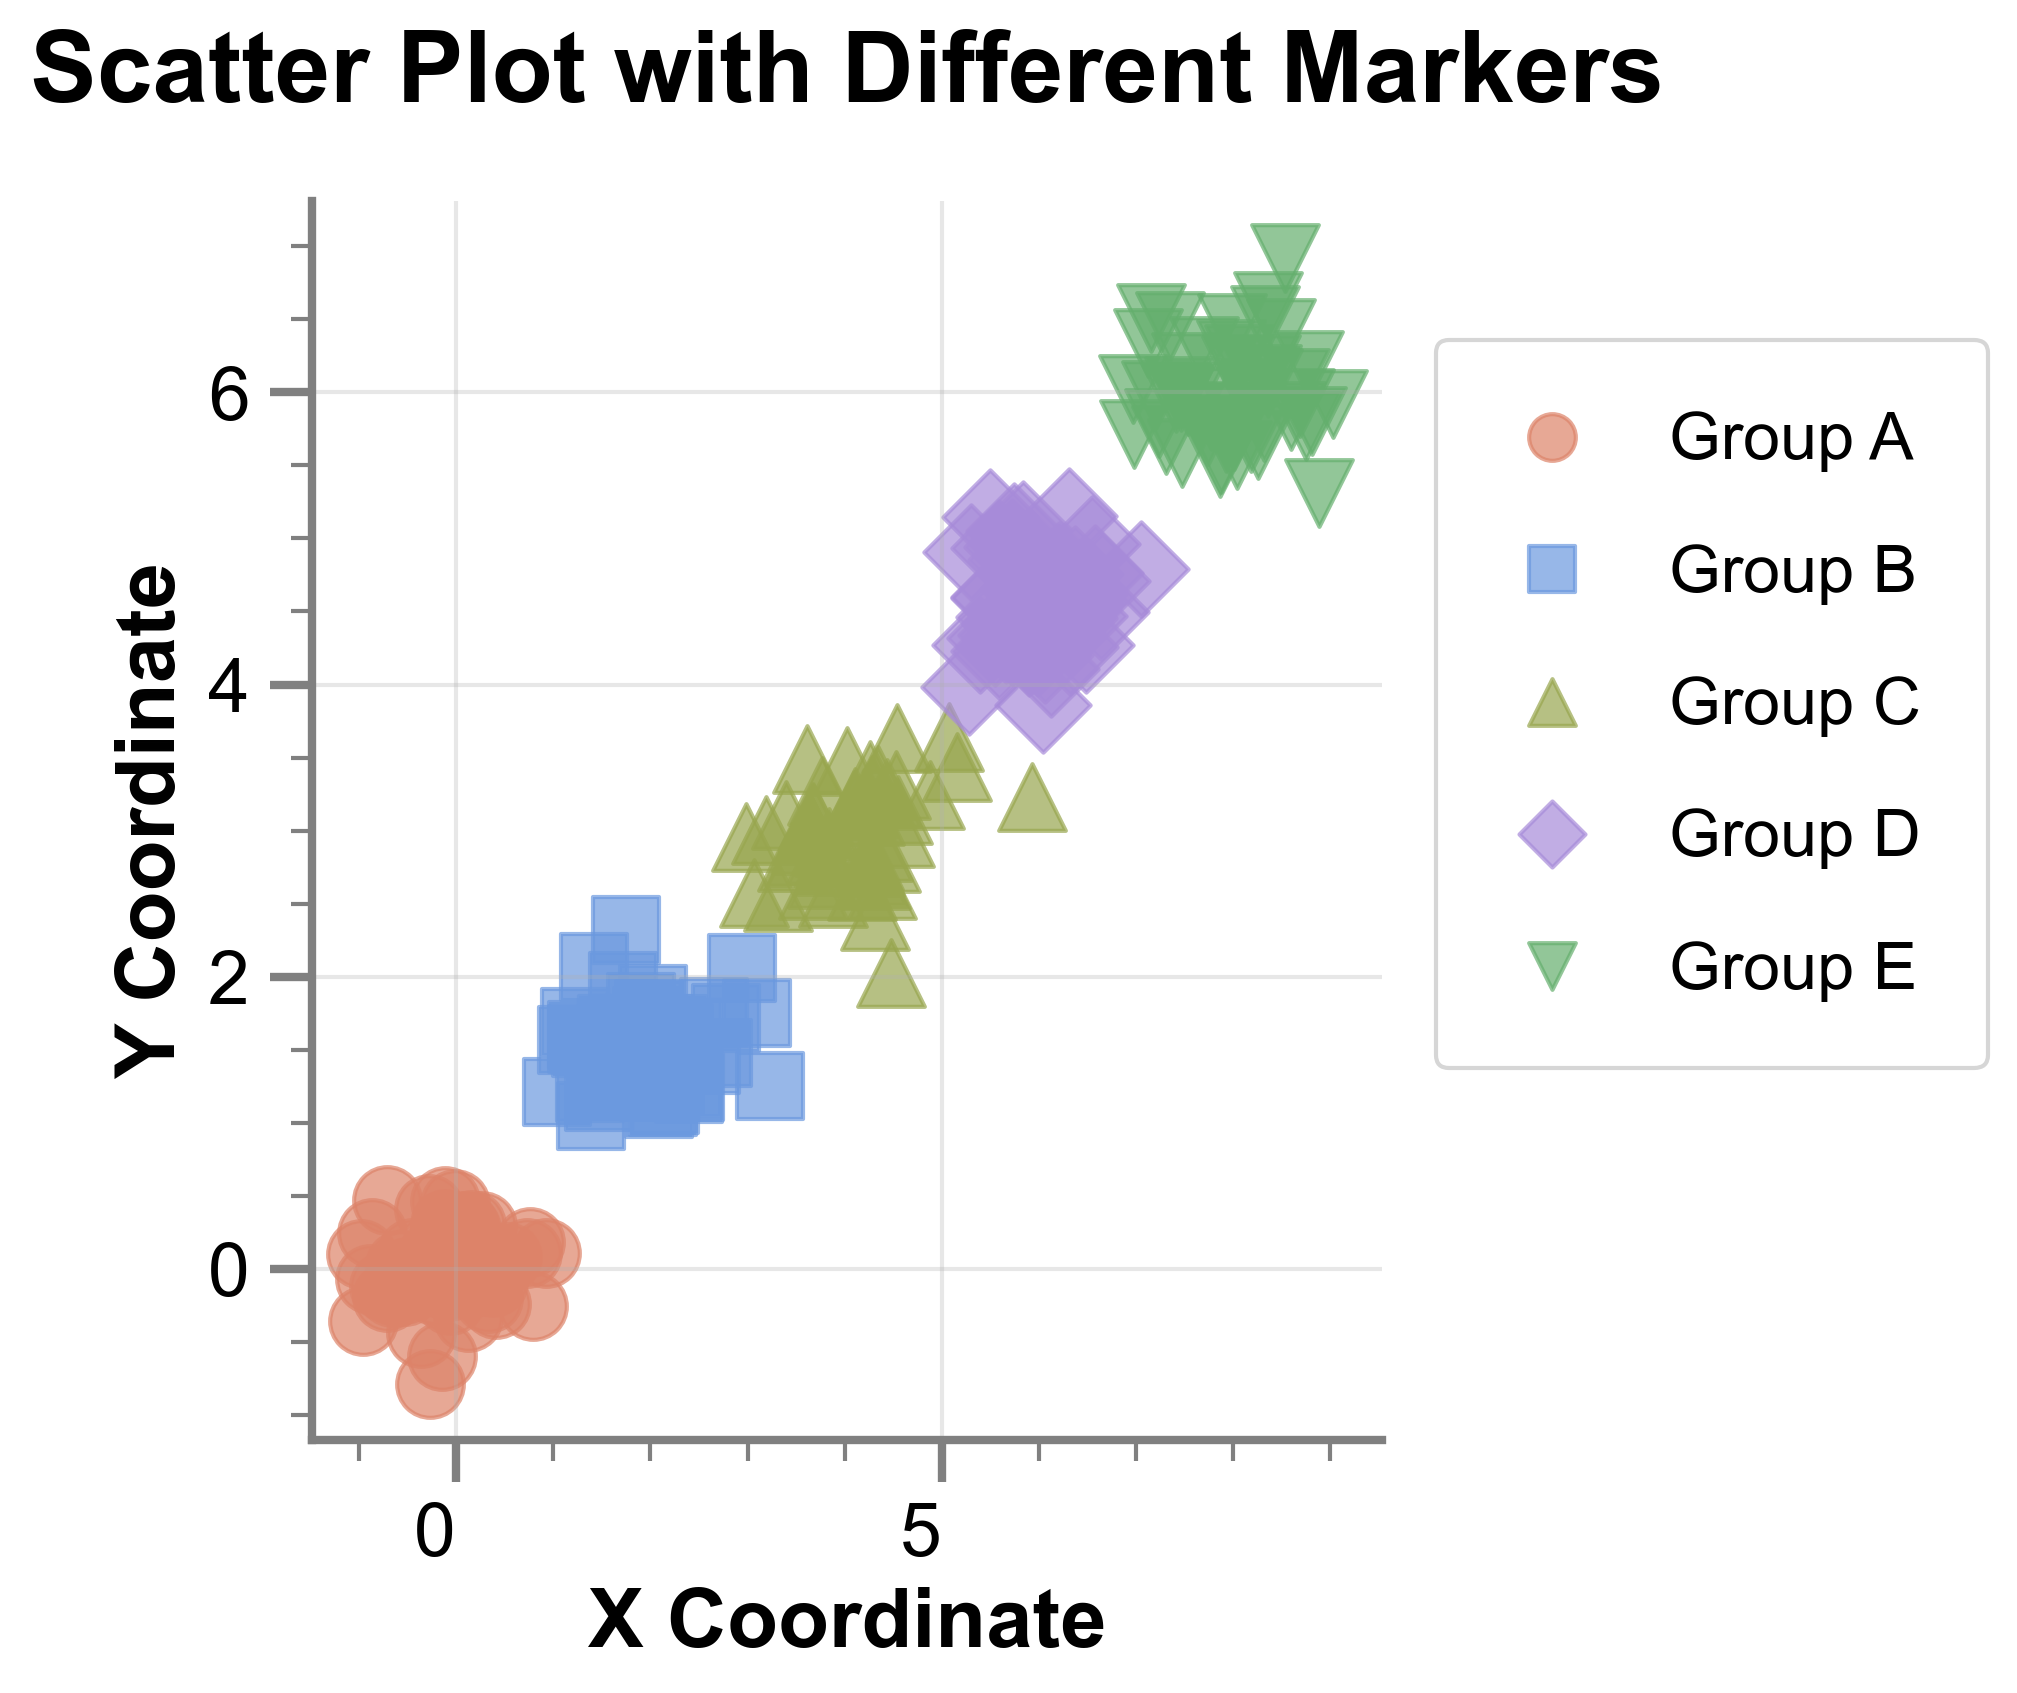

In [44]:
# Generate sample data
np.random.seed(42)
n_points = 50

fig, ax = plt.subplots()

# Create scatter plots with different markers
markers = ['o', 's', '^', 'D', 'v']
for i, marker in enumerate(markers):
    x = np.random.normal(i * 2, 0.5, n_points)
    y = np.random.normal(i * 1.5, 0.3, n_points)
    ax.scatter(x, y, label=f'Group {chr(65+i)}', marker=marker, alpha=0.7)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot with Different Markers')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

## 3. Bar Plot with Error Bars

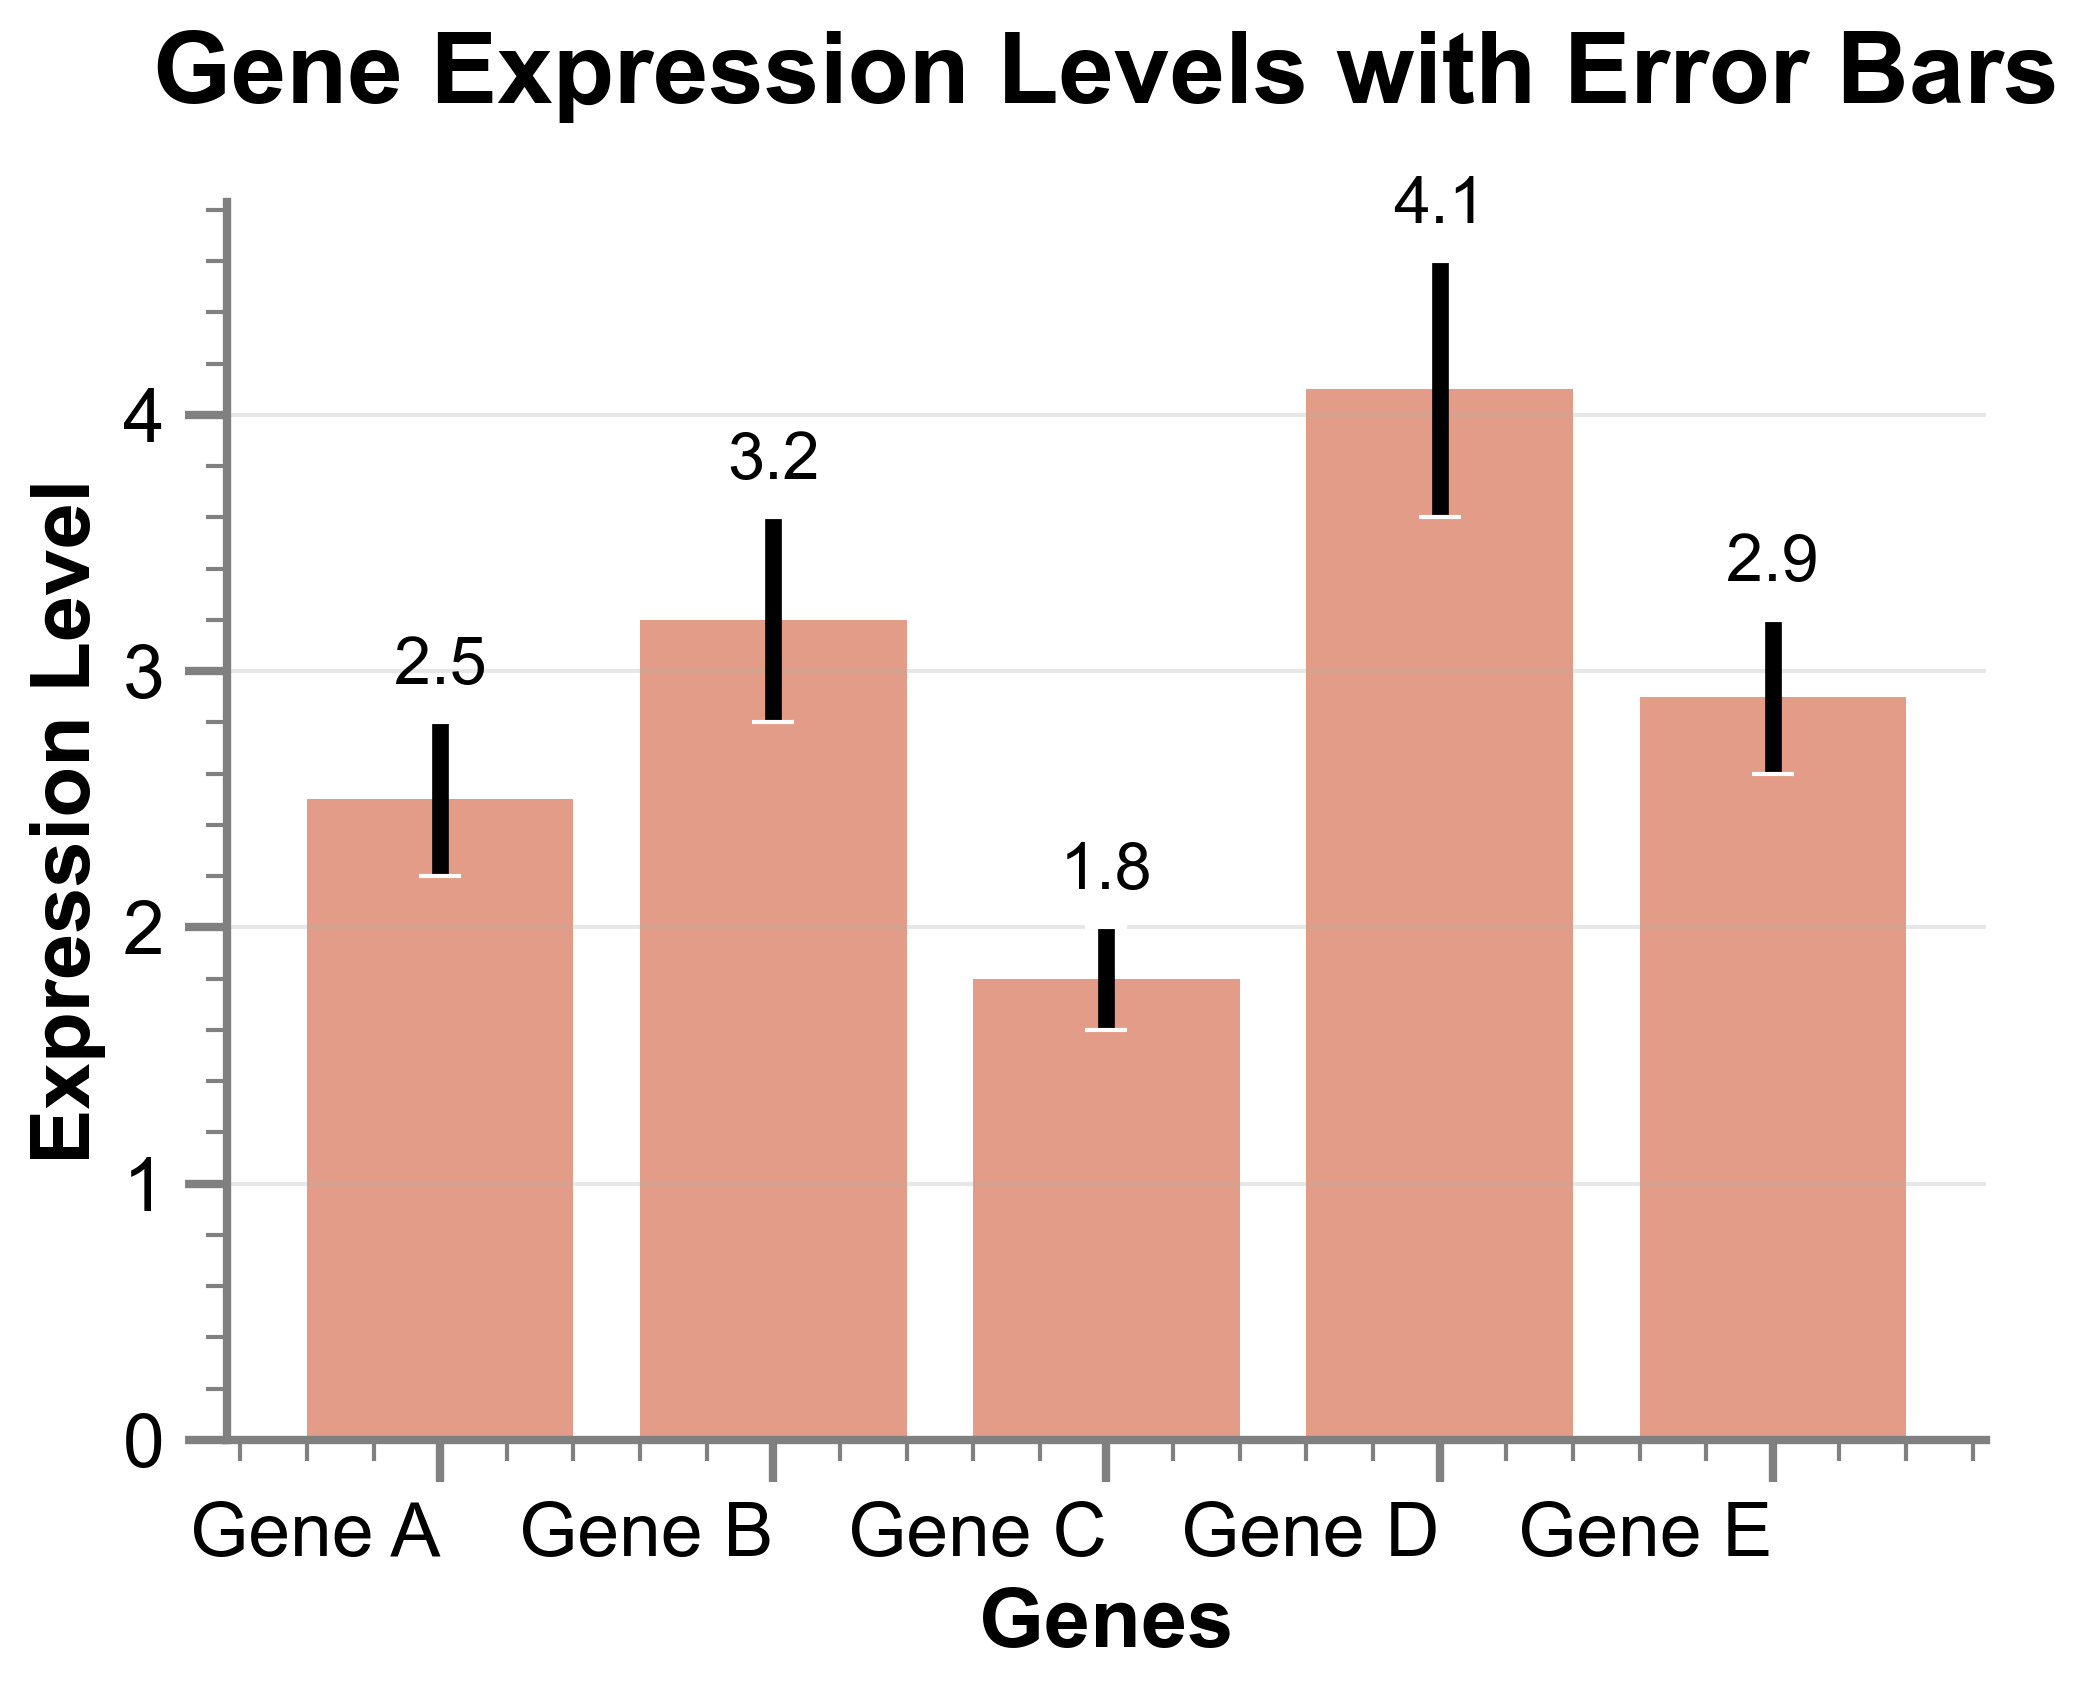

In [45]:
# Sample data for bar plot
categories = ['Gene A', 'Gene B', 'Gene C', 'Gene D', 'Gene E']
values = [2.5, 3.2, 1.8, 4.1, 2.9]
errors = [0.3, 0.4, 0.2, 0.5, 0.3]

fig, ax = plt.subplots()

# Create bar plot
bars = ax.bar(categories, values, yerr=errors, capsize=5, alpha=0.8)

ax.set_xlabel('Genes')
ax.set_ylabel('Expression Level')
ax.set_title('Gene Expression Levels with Error Bars')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    idx = list(bars).index(bar)
    ax.text(bar.get_x() + bar.get_width() / 2., height + errors[idx] + 0.1, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.close()

## 4. Box Plot Demonstration

/tmp/ipykernel_1177419/4045888334.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data, labels=labels, patch_artist=True)


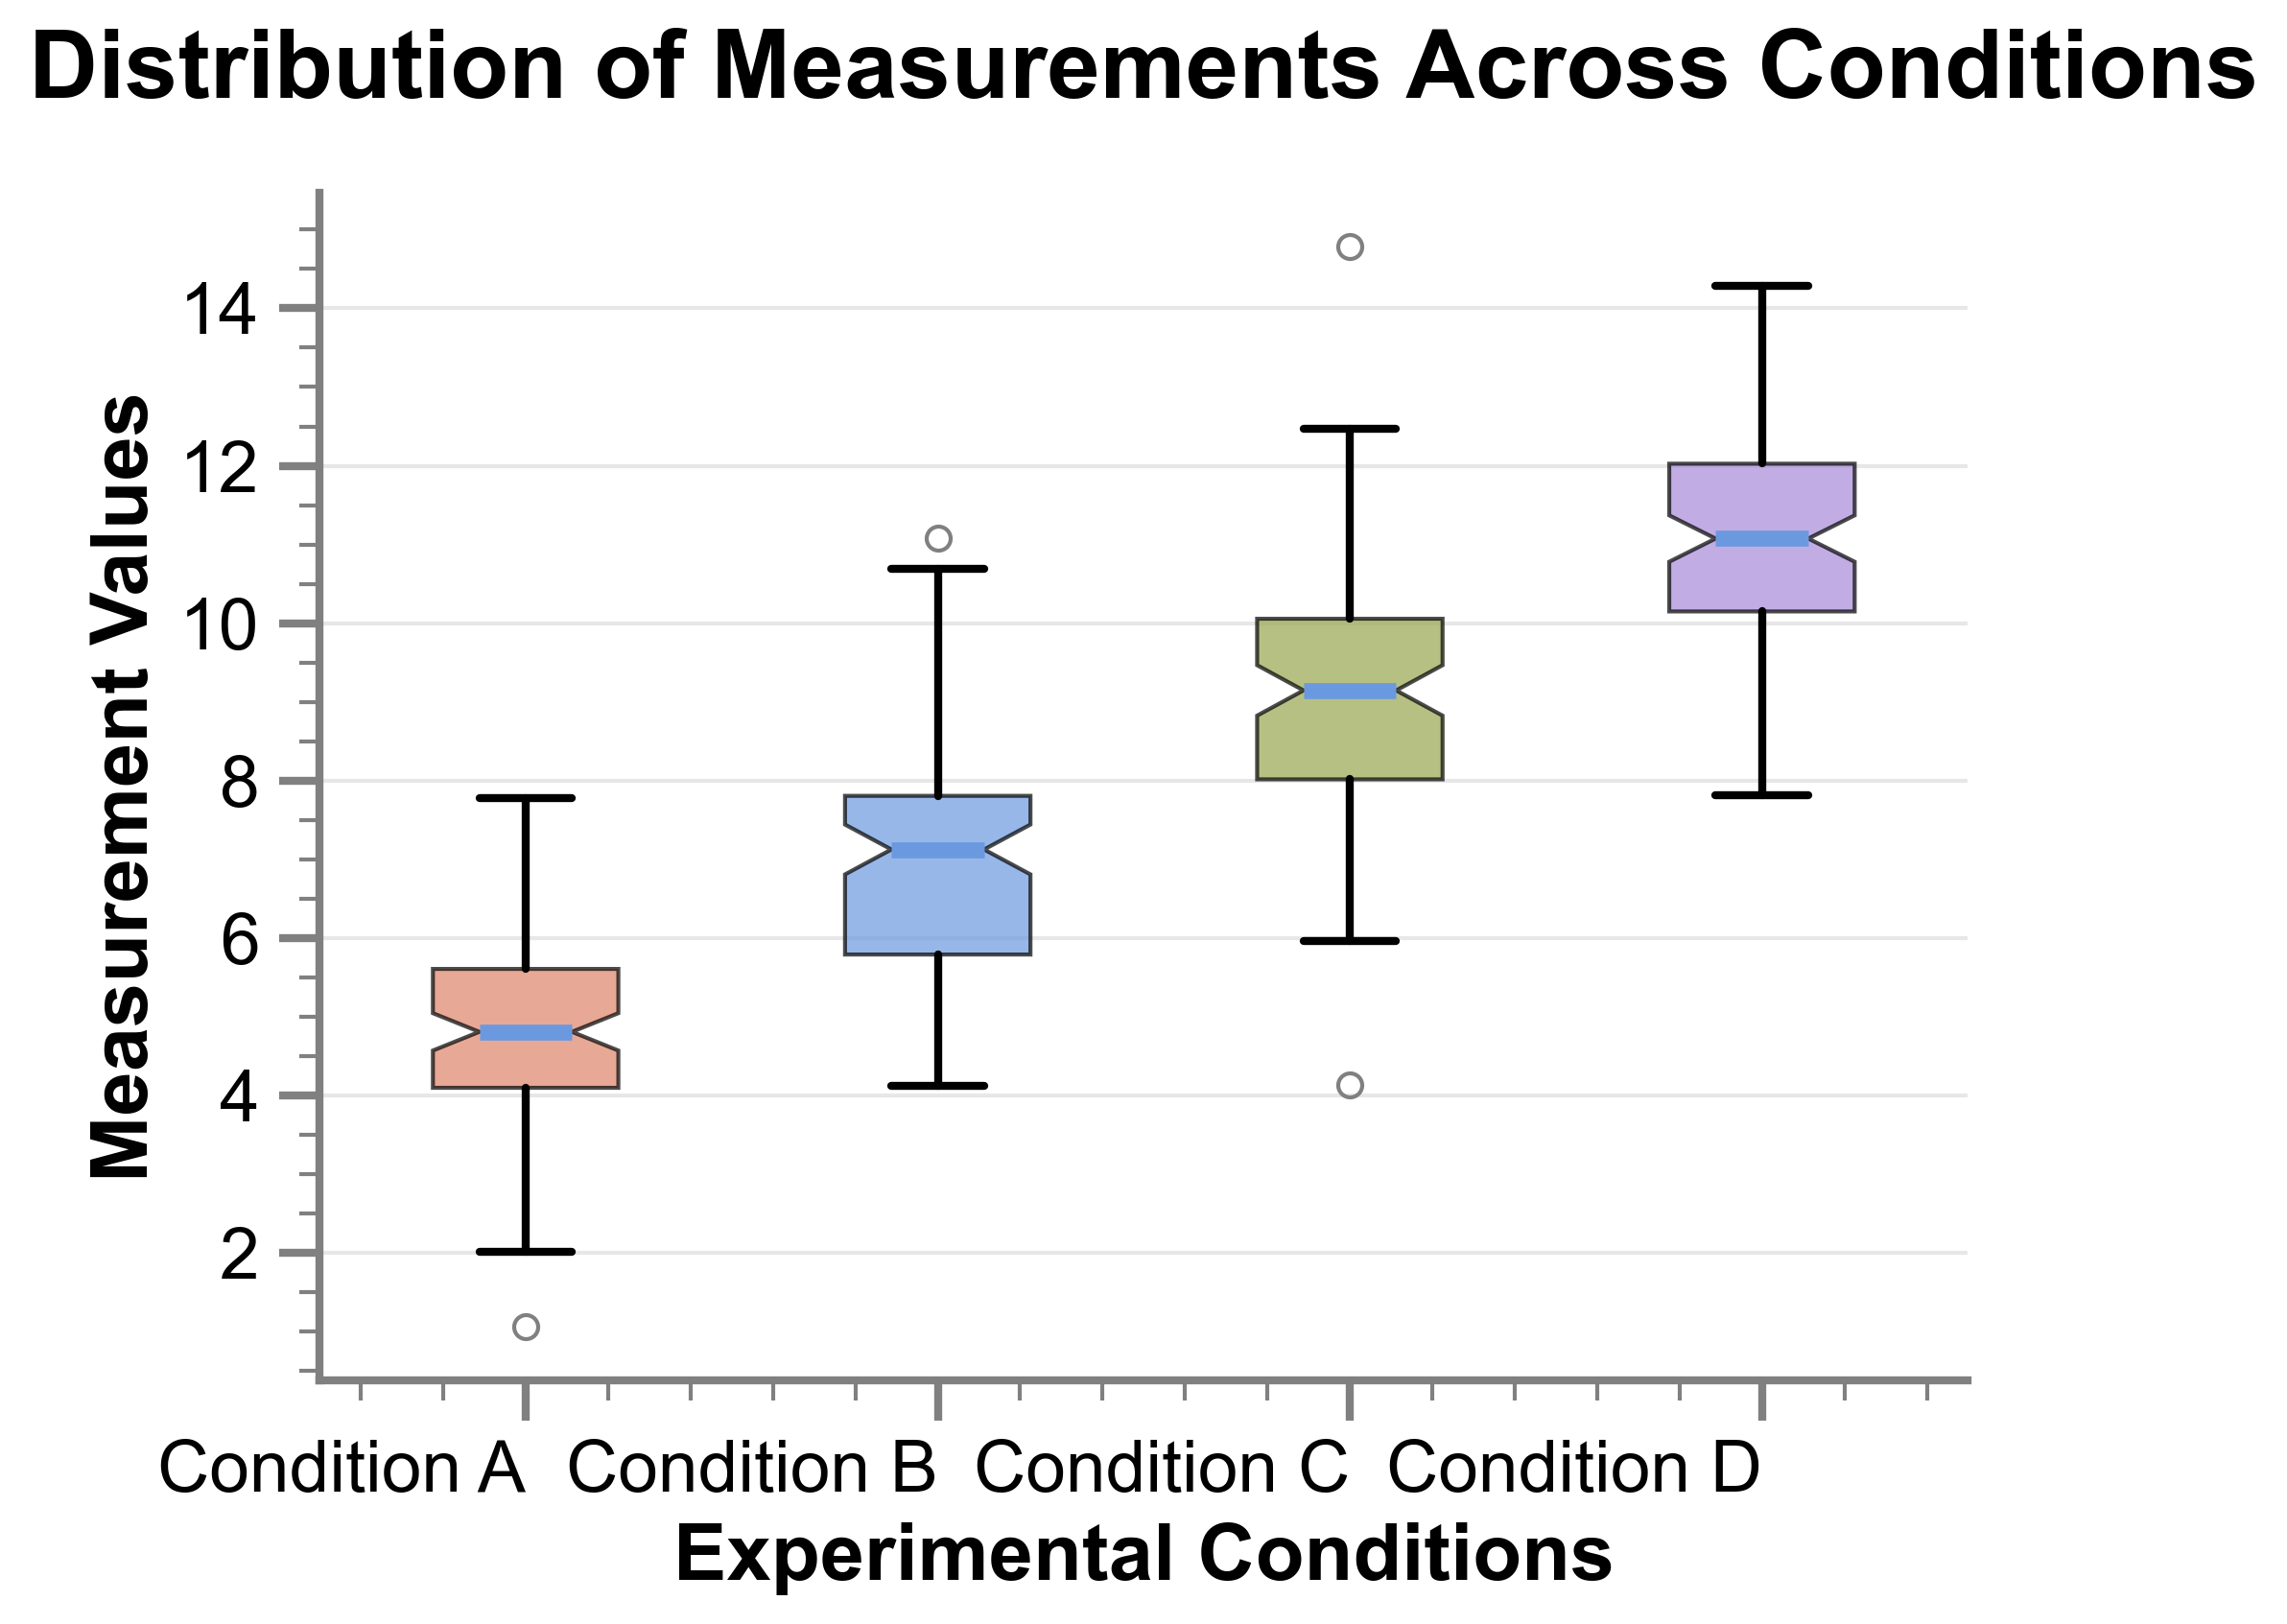

In [46]:
# Generate sample data for box plot
np.random.seed(42)
data = []
labels = []

for i in range(4):
    # Create data with different distributions
    sample_data = np.random.normal(i * 2 + 5, 1.5, 100)
    data.append(sample_data)
    labels.append(f'Condition {chr(65+i)}')

fig, ax = plt.subplots()

# Create box plot
box_plot = ax.boxplot(data, labels=labels, patch_artist=True)

# Color the boxes
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for patch, color in zip(box_plot['boxes'], colors[:len(data)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Experimental Conditions')
ax.set_ylabel('Measurement Values')
ax.set_title('Distribution of Measurements Across Conditions')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.close()

## 5. Histogram with Different Bin Counts

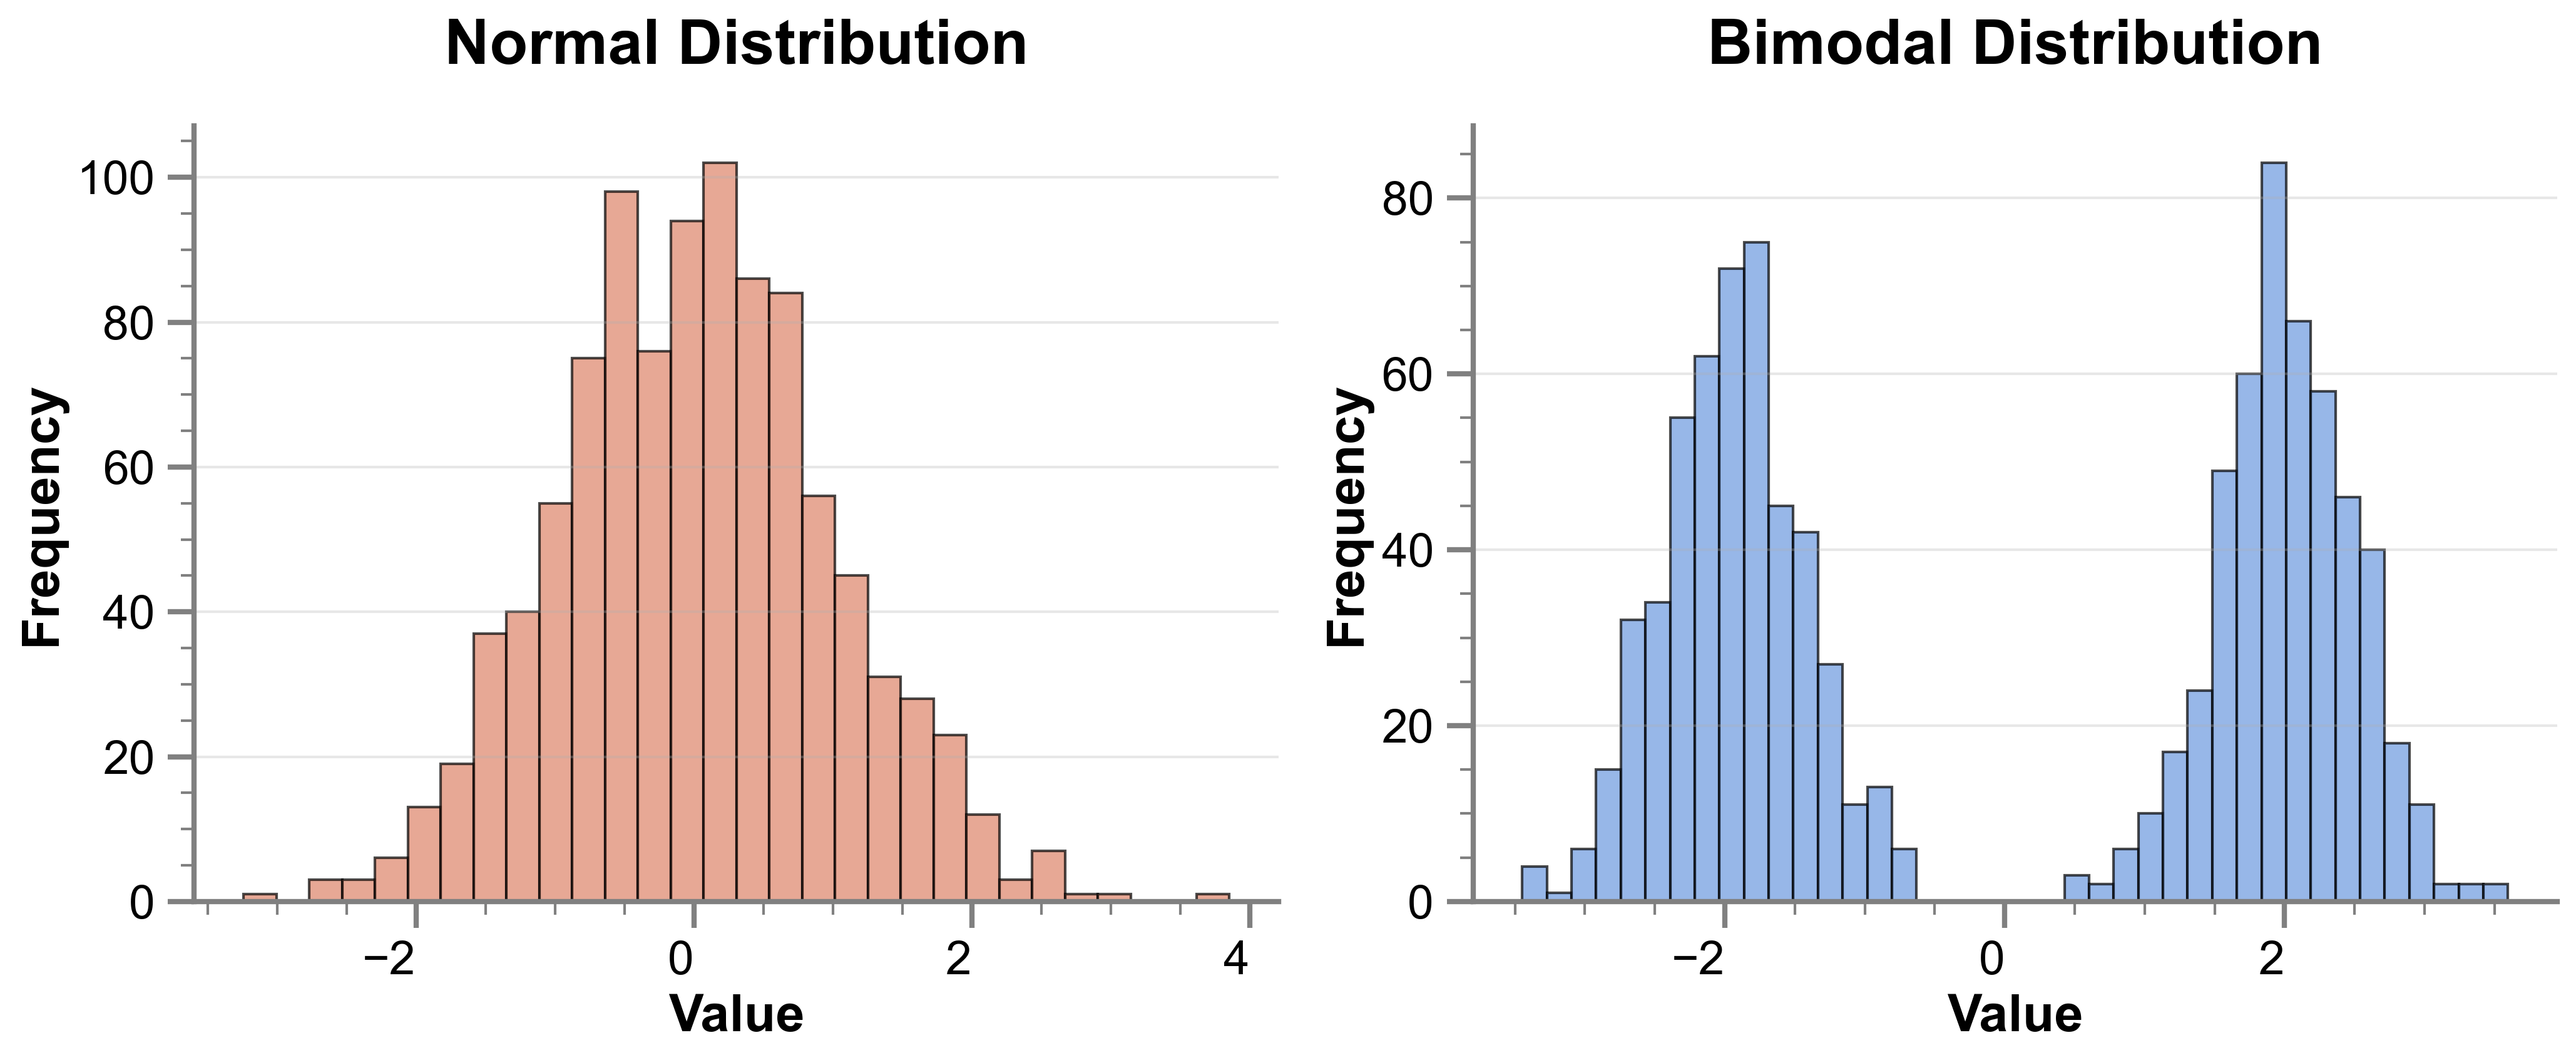

In [47]:
# Generate sample data
np.random.seed(42)
data_normal = np.random.normal(0, 1, 1000)
data_bimodal = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*AX_WIDTH, AX_HEIGHT))

# Normal distribution histogram
ax1.hist(data_normal, bins=30, alpha=0.7, edgecolor='black', linewidth=1)
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Normal Distribution')
ax1.grid(True, alpha=0.3, axis='y')

# Bimodal distribution histogram
ax2.hist(data_bimodal, bins=40, alpha=0.7, edgecolor='black', linewidth=1, color='C1')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Bimodal Distribution')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.close()

## 6. Subplot Layout Demonstration

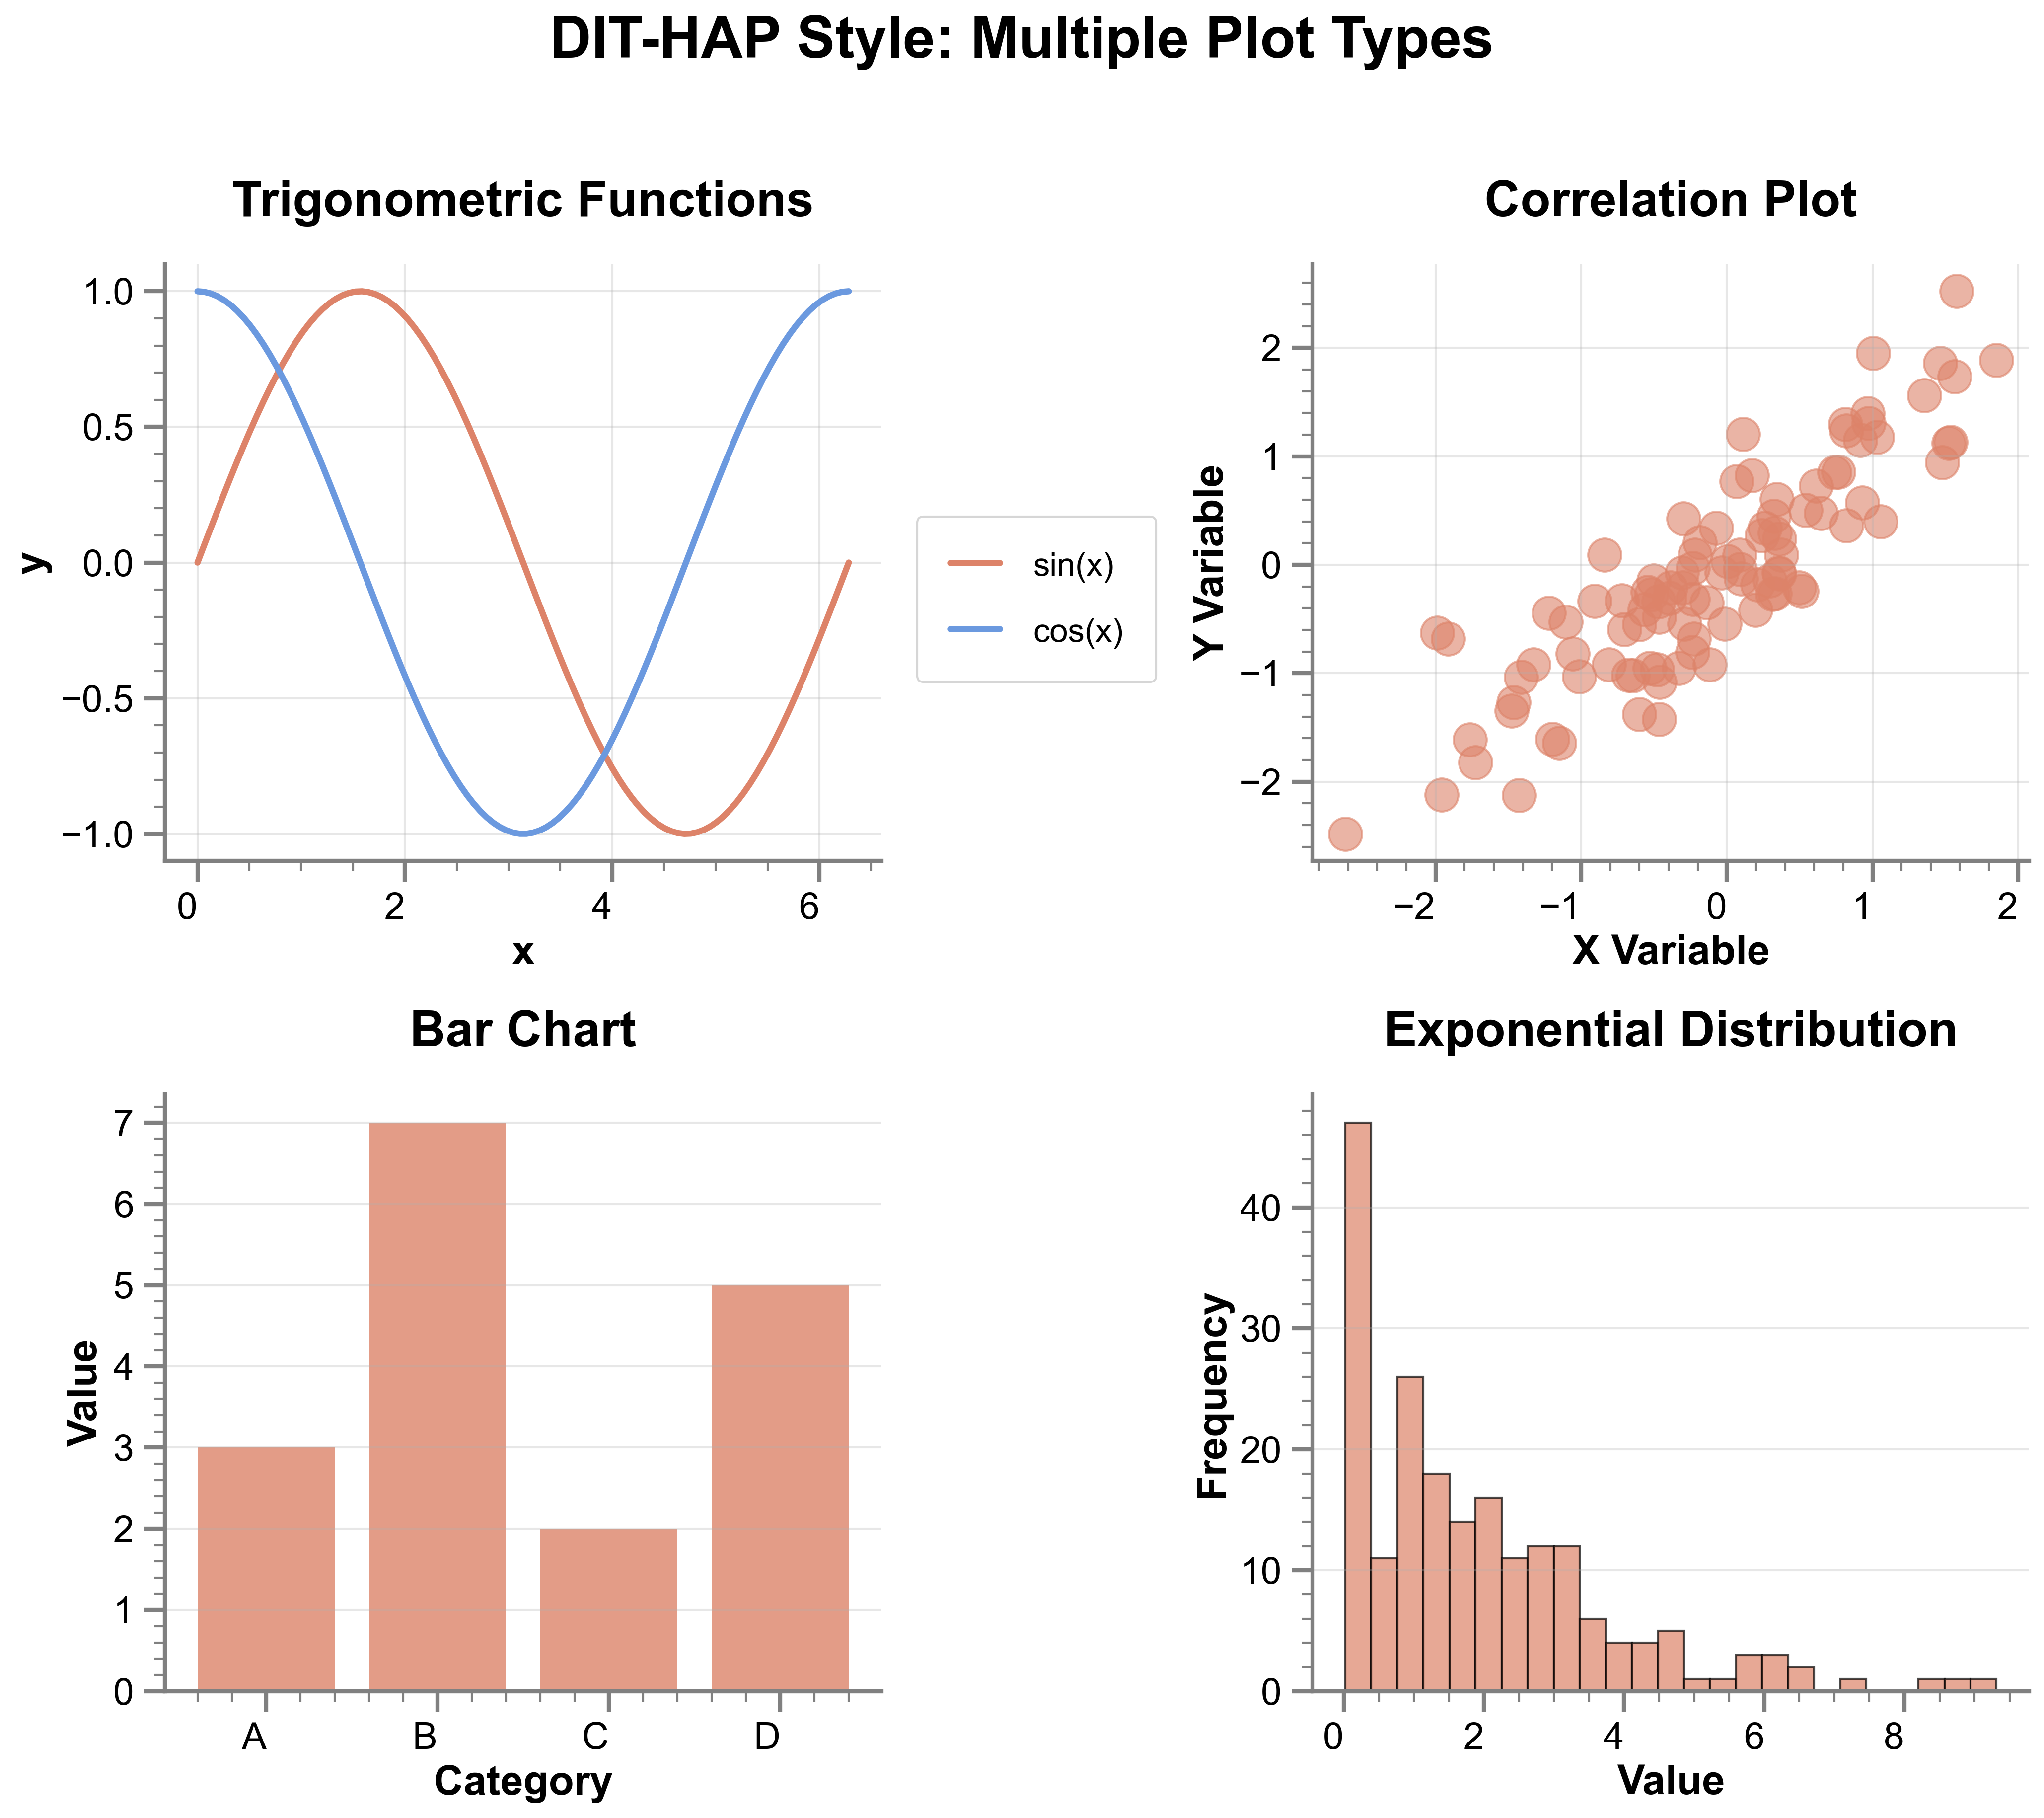

In [48]:
# Create a 2x2 subplot layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(2*AX_WIDTH, 2*AX_HEIGHT))

# Subplot 1: Line plot
x = np.linspace(0, 2*np.pi, 100)
ax1.plot(x, np.sin(x), label='sin(x)', linewidth=3)
ax1.plot(x, np.cos(x), label='cos(x)', linewidth=3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Trigonometric Functions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Scatter plot
np.random.seed(42)
x_scatter = np.random.randn(100)
y_scatter = x_scatter + np.random.randn(100) * 0.5
ax2.scatter(x_scatter, y_scatter, alpha=0.6)
ax2.set_xlabel('X Variable')
ax2.set_ylabel('Y Variable')
ax2.set_title('Correlation Plot')
ax2.grid(True, alpha=0.3)

# Subplot 3: Bar plot
categories = ['A', 'B', 'C', 'D']
values = [3, 7, 2, 5]
ax3.bar(categories, values, alpha=0.8)
ax3.set_xlabel('Category')
ax3.set_ylabel('Value')
ax3.set_title('Bar Chart')
ax3.grid(True, alpha=0.3, axis='y')

# Subplot 4: Histogram
data_hist = np.random.exponential(2, 200)
ax4.hist(data_hist, bins=25, alpha=0.7, edgecolor='black', linewidth=1)
ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')
ax4.set_title('Exponential Distribution')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('DIT-HAP Style: Multiple Plot Types', fontsize=28, y=1.02)
plt.tight_layout()
plt.show()
plt.close()

## 7. Scientific Plot Example - Depletion Curve

This demonstrates a typical plot you might see in the DIT-HAP pipeline analysis.

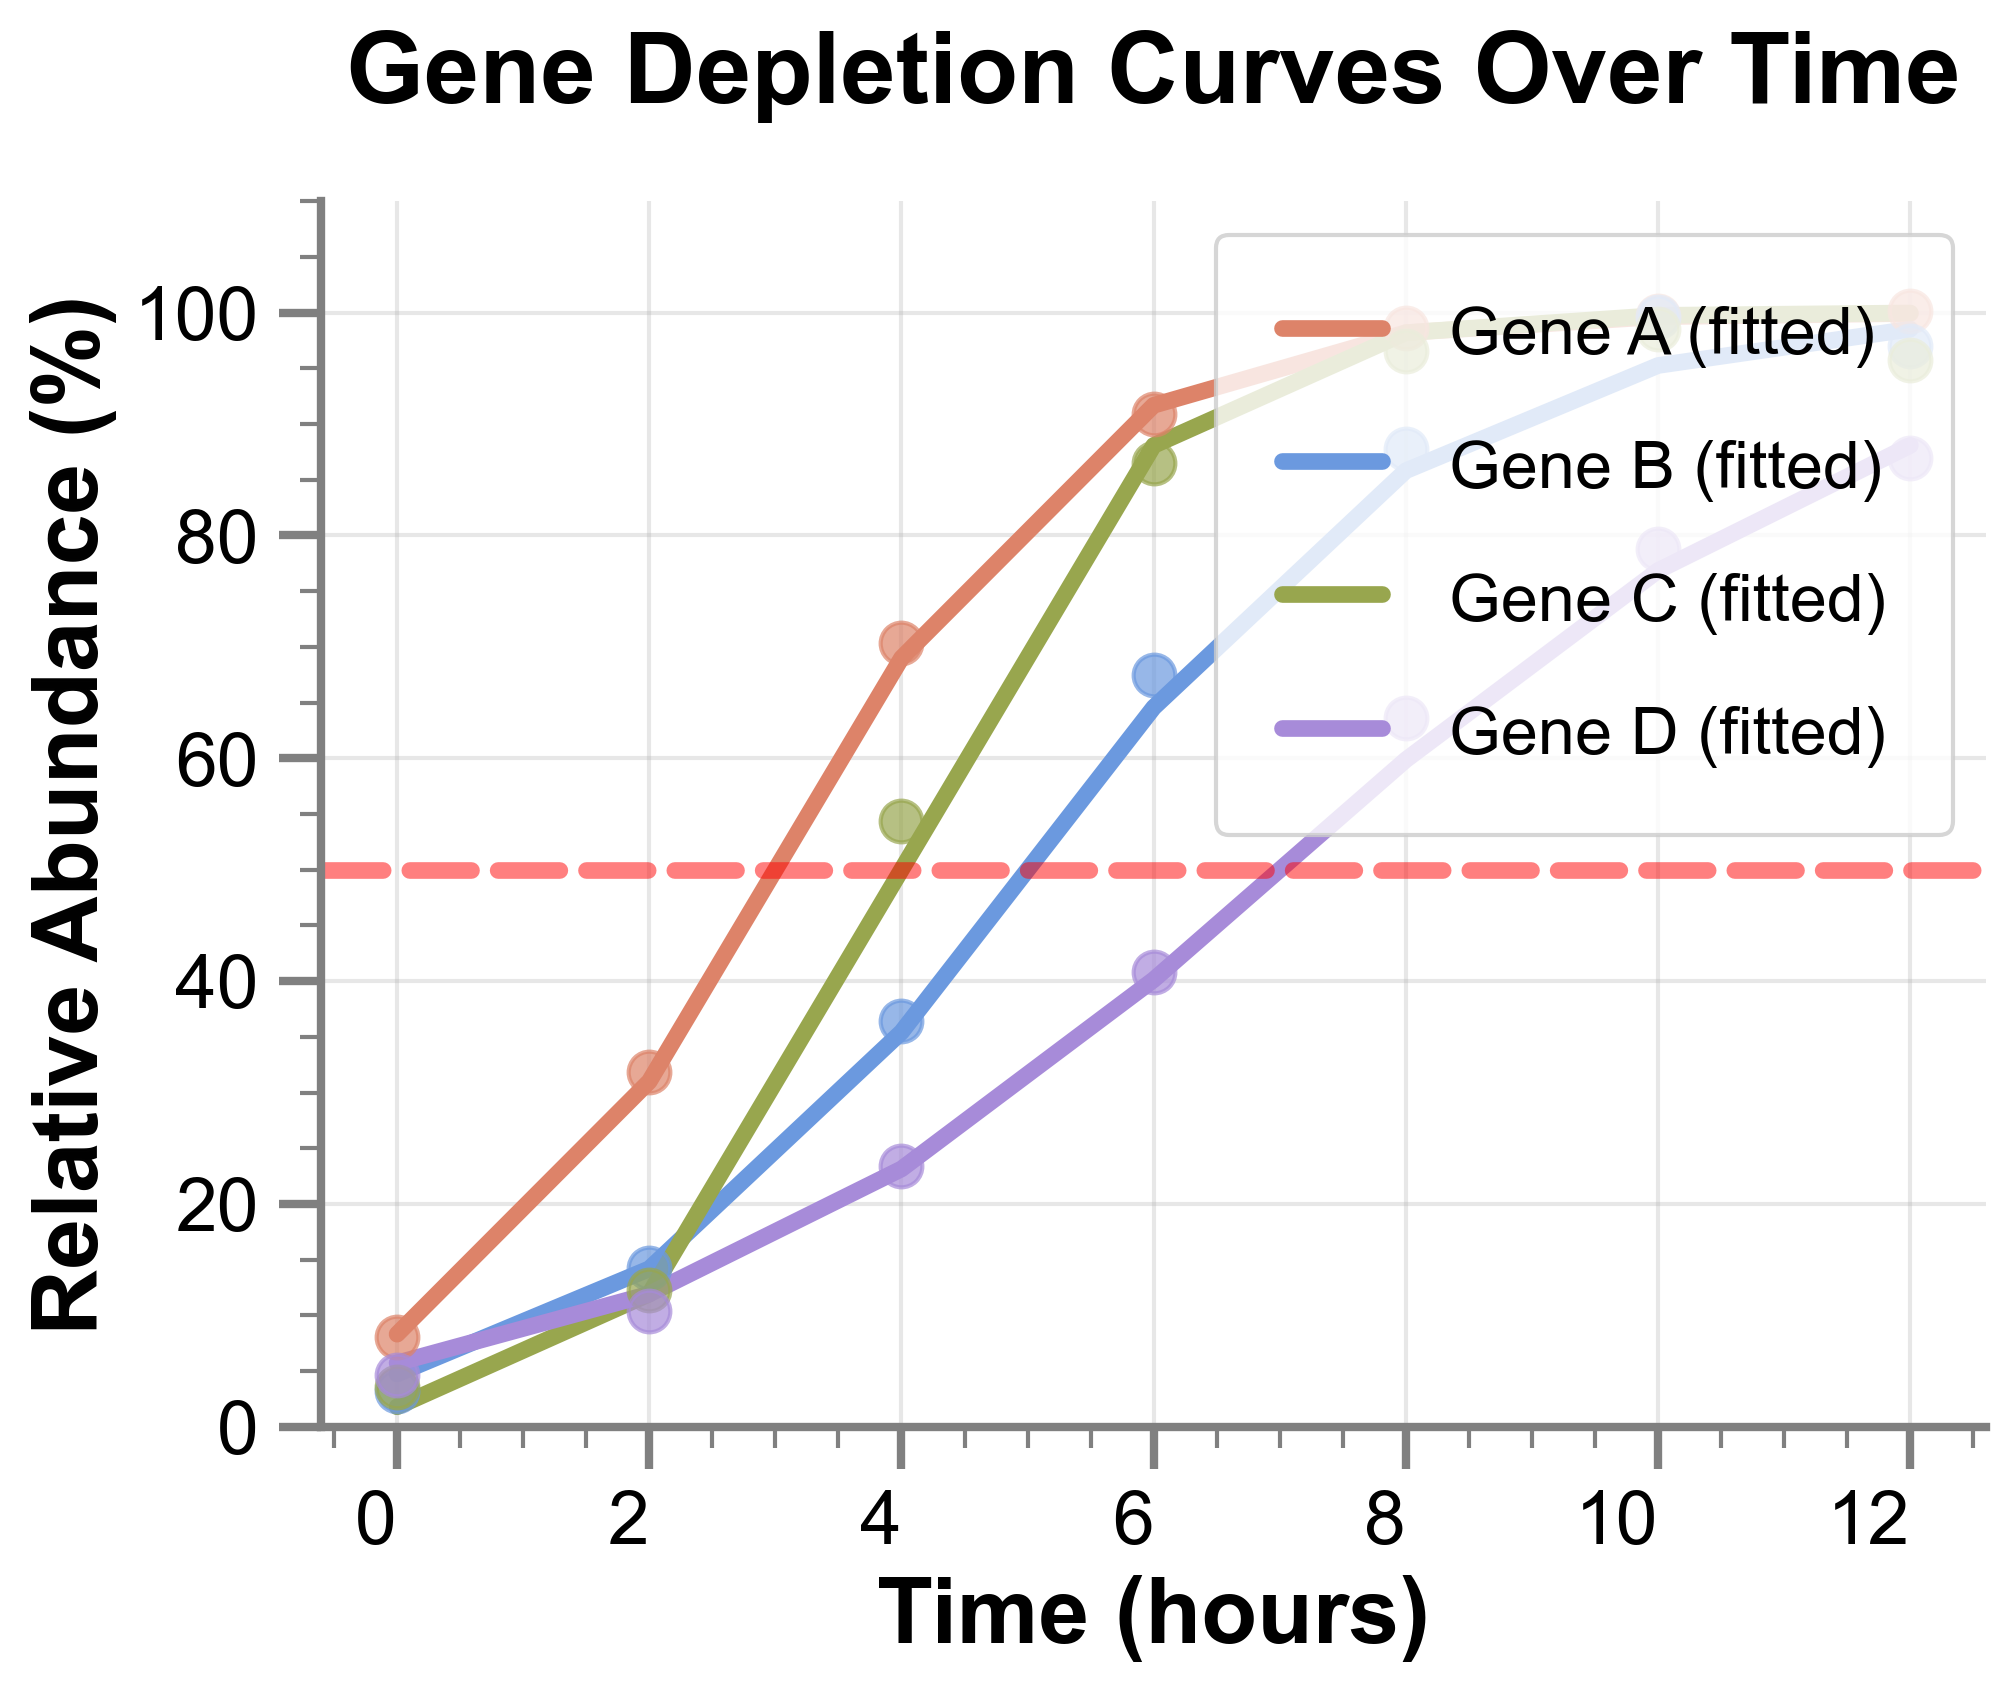

In [49]:
# Generate depletion curve data
timepoints = np.array([0, 2, 4, 6, 8, 10, 12])

# Simulate depletion curves for different genes
def logistic_depletion(t, k, r, t0):
    """Logistic depletion model"""
    return k / (1 + np.exp(-r * (t - t0)))

fig, ax = plt.subplots()

# Plot depletion curves for different genes
genes = ['Gene A', 'Gene B', 'Gene C', 'Gene D']
params = [
    (100, 0.8, 3),  # k, r, t0
    (100, 0.6, 5),
    (100, 1.0, 4),
    (100, 0.4, 7)
]

for gene, (k, r, t0) in zip(genes, params):
    y_values = logistic_depletion(timepoints, k, r, t0)
    # Add some noise
    noise = np.random.normal(0, 2, len(timepoints))
    y_noisy = y_values + noise
    
    # Plot both points and fitted curve
    ax.plot(timepoints, y_values, linewidth=4, label=f'{gene} (fitted)')
    ax.scatter(timepoints, y_noisy, s=100, alpha=0.7, zorder=5)

ax.set_xlabel('Time (hours)', fontsize=22)
ax.set_ylabel('Relative Abundance (%)', fontsize=22)
ax.set_title('Gene Depletion Curves Over Time', fontsize=24)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 110)

# Add horizontal line at 50%
ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')

plt.tight_layout()
plt.show()
plt.close()

## 8. Style Parameters Summary

Let's display the key style parameters used in this configuration:

In [50]:
# Get current rcParams
params = plt.rcParams

# Display key parameters
key_params = {
    'Font Family': params['font.family'],
    'Font Size': params['font.size'],
    'Axes Label Size': params['axes.labelsize'],
    'Axes Title Size': params['axes.titlesize'],
    'Tick Label Size': params['xtick.labelsize'],
    'Line Width': params['lines.linewidth'],
    'Marker Size': params['lines.markersize'],
    'Legend Font Size': params['legend.fontsize'],
    'Figure DPI': params['figure.dpi'],
    'Figure Facecolor': params['figure.facecolor'],
    'Axes Facecolor': params['axes.facecolor'],
    'Grid Alpha': params['grid.alpha'],
    'Legend Location': params['legend.loc']
}

print("DIT-HAP Style Key Parameters:")
print("=" * 40)
for param, value in key_params.items():
    print(f"{param:.<25} {value}")

print("\nColor Cycle:")
print("=" * 40)
colors = params['axes.prop_cycle'].by_key()['color']
for i, color in enumerate(colors):
    print(f"Color {i+1:<10} {color}")

DIT-HAP Style Key Parameters:
Font Family.............. ['Arial']
Font Size................ 16.0
Axes Label Size.......... 20.0
Axes Title Size.......... 24.0
Tick Label Size.......... 18.0
Line Width............... 4.0
Marker Size.............. 16.0
Legend Font Size......... 16.0
Figure DPI............... 300.0
Figure Facecolor......... white
Axes Facecolor........... white
Grid Alpha............... 0.3
Legend Location.......... (1.05, 0.3)

Color Cycle:
Color 1          #dd8369
Color 2          #6b99df
Color 3          #98a64e
Color 4          #a78bd9
Color 5          #64af6d
Color 6          #d57fbd
Color 7          #4bb29c
Color 8          #e0788f
Color 9          #4aadce
Color 10         #c4954b


## 9. Save Figure Example

Demonstrating how the style affects saved figures with the configured settings.

Figure saved as 'dit_hap_style_example.pdf'
Save format: pdf
Save DPI: 300.0
Transparent background: True


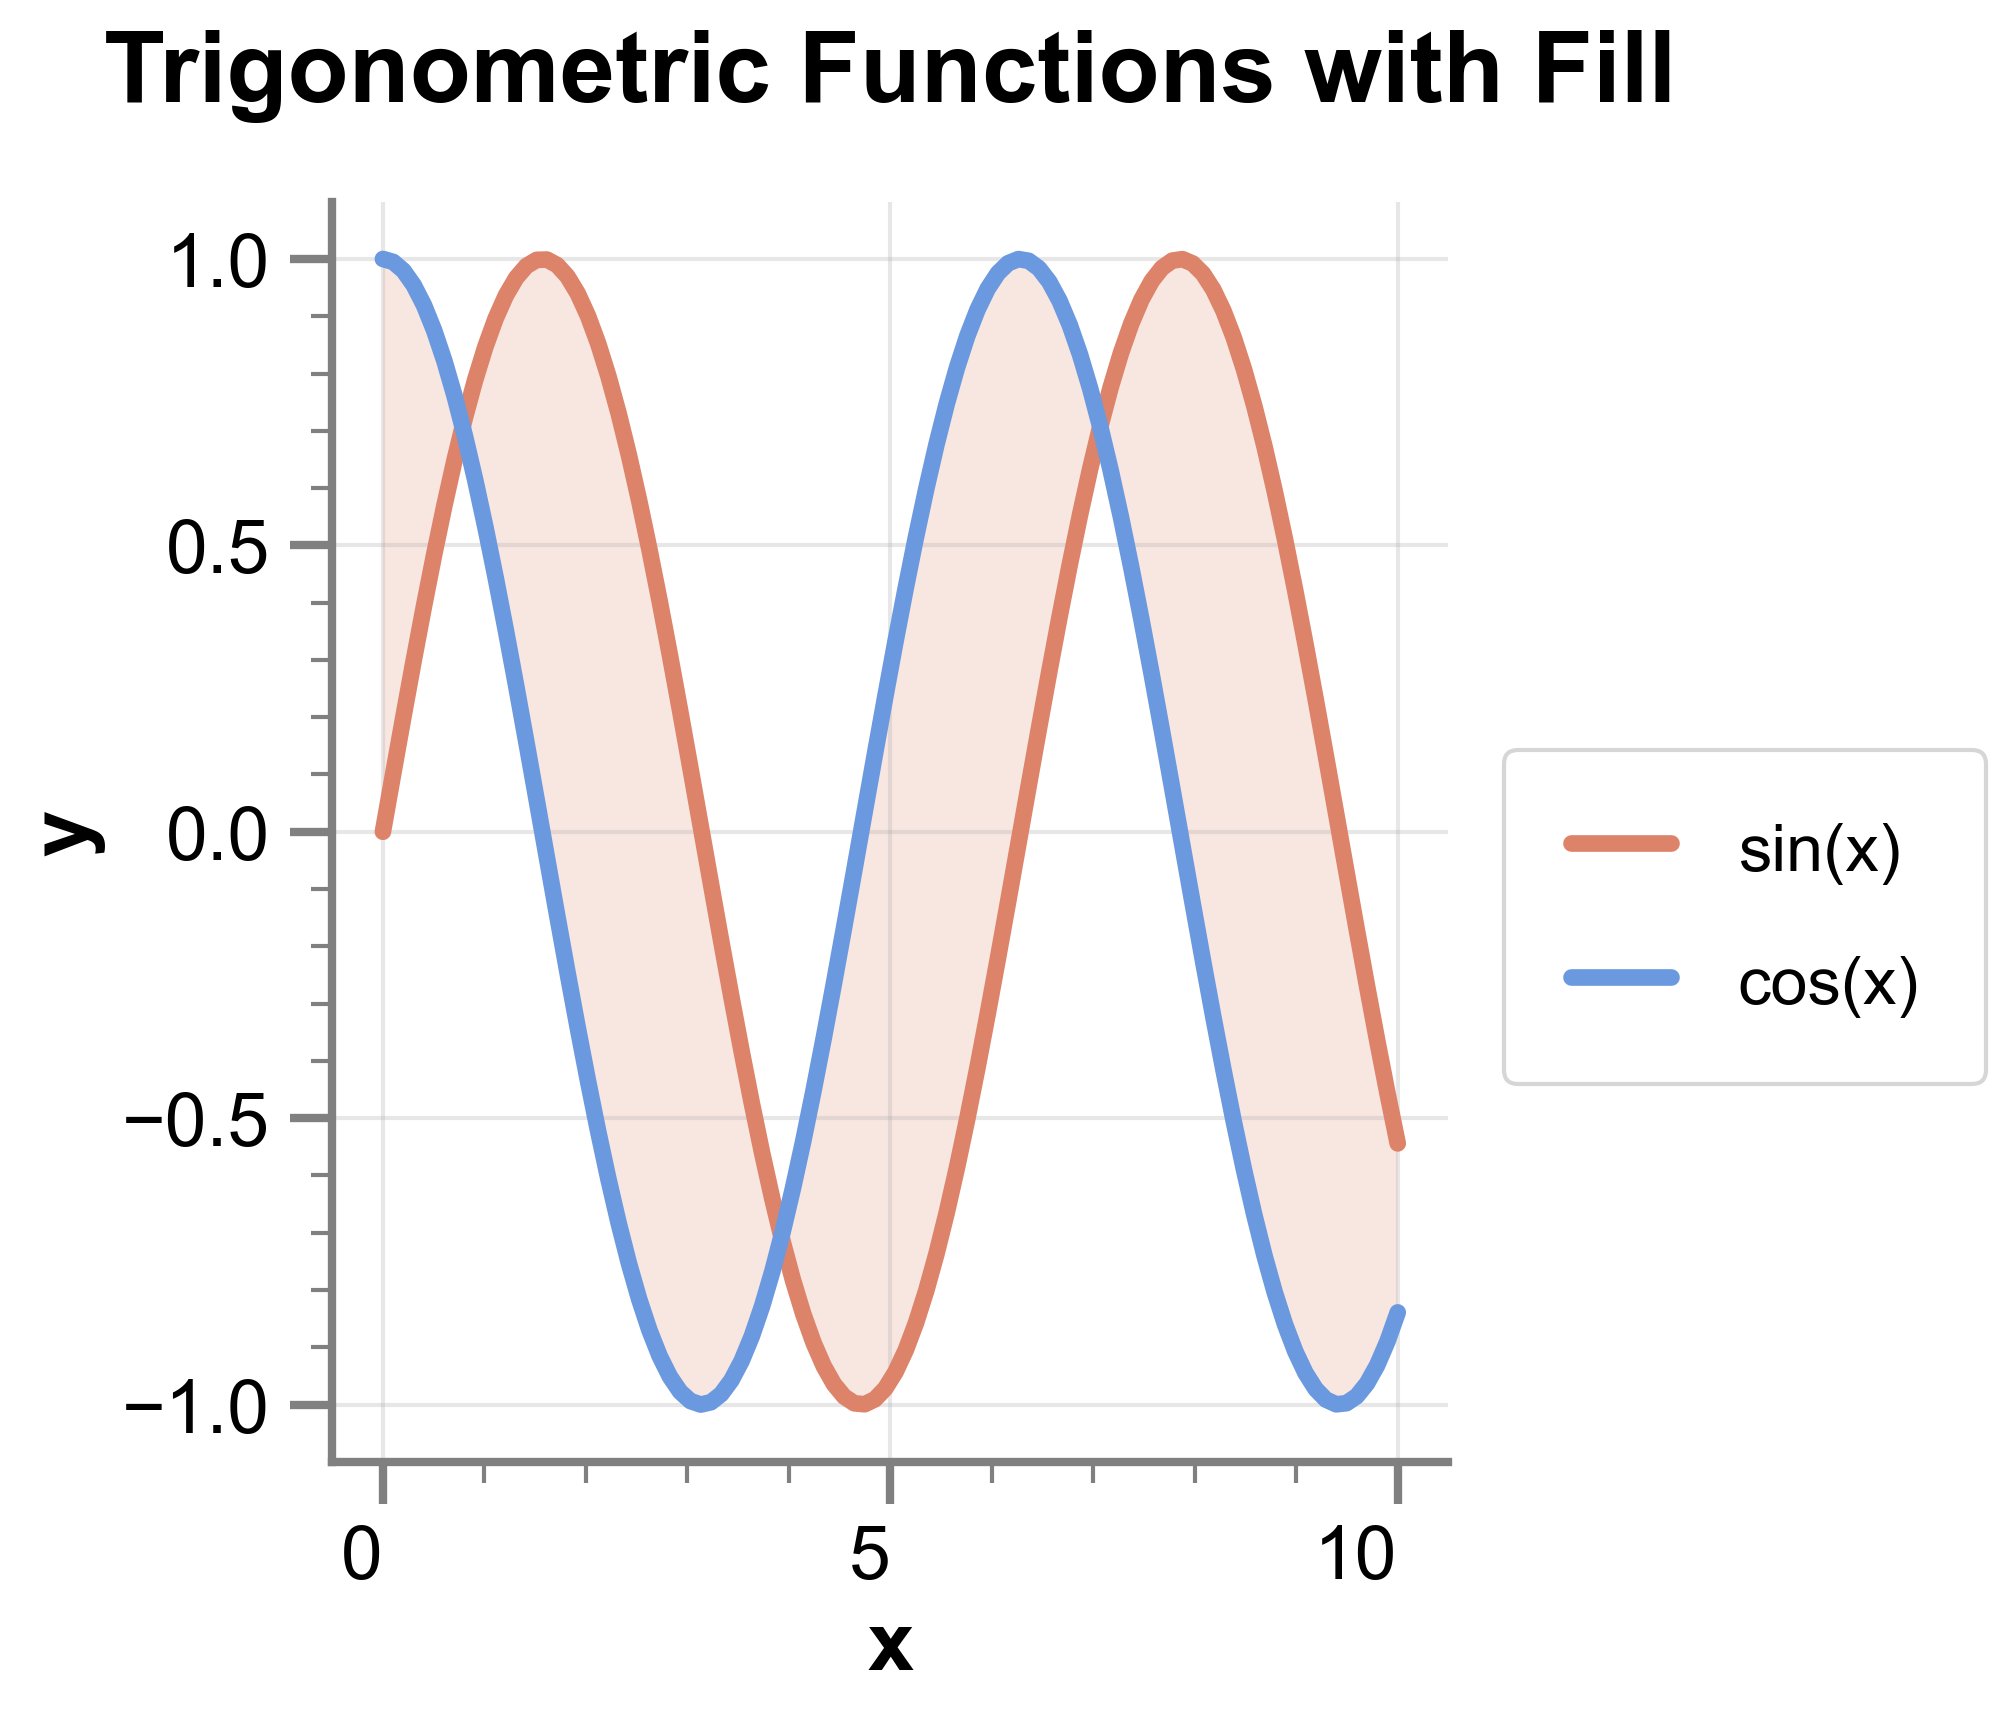

In [51]:
# Create a sample figure to save
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax.plot(x, y1, label='sin(x)', linewidth=4)
ax.plot(x, y2, label='cos(x)', linewidth=4)
ax.fill_between(x, y1, y2, alpha=0.2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trigonometric Functions with Fill')
ax.legend()
ax.grid(True, alpha=0.3)

# Save with default settings (transparent background, PDF format, 300 DPI)
plt.savefig('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/workflow/notebooks/dit_hap_style_example.pdf', 
            bbox_inches='tight', dpi=300)

print("Figure saved as 'dit_hap_style_example.pdf'")
print(f"Save format: {params['savefig.format']}")
print(f"Save DPI: {params['savefig.dpi']}")
print(f"Transparent background: {params['savefig.transparent']}")

plt.show()
plt.close()

## Summary

The DIT-HAP matplotlib style provides:

1. **Professional Appearance**: High-quality figures suitable for publications
2. **Consistent Branding**: Unified color scheme and typography
3. **Readability**: Large fonts and clear visual hierarchy
4. **Publication Settings**: High DPI, transparent backgrounds, PDF output
5. **Scientific Standards**: Proper grid lines, error bars, and legends

This style is optimized for the DIT-HAP pipeline's visualization needs, ensuring all generated figures have a consistent, professional appearance across the entire analysis workflow.